# CYCLOPS on Hughes Liver Data (Boxplots: PCA)

## 1. Importing packages

In [1]:
from cyclops_v2 import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading data

#### Read the Hughes Liver data into a pandas dataframe:

In [2]:
df = pd.read_csv("Hughes_2009_liver_new.csv").T
df = df.iloc[1:,:]

In [3]:
ng = df.shape[1]
nc = df.shape[0]
print("Running on {} genes and {} cells.".format(ng,nc))

Running on 9471 genes and 48 cells.


Filter genes in the top 10% variance:

In [4]:
frac = 0.10

df_std = pd.DataFrame(df.std().sort_values(ascending=False))
df_std = df_std.iloc[:round(df_std.shape[0]*frac),:]
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 8364 to 2568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       947 non-null    float64
dtypes: float64(1)
memory usage: 14.8 KB


In [5]:
gene_list = df_std.index.to_numpy()

In [6]:
data = df.to_numpy().T

newdata = np.zeros([len(gene_list),nc])
for i in range(len(gene_list)):
    newdata[i] = data[gene_list[i]]
newdata = pd.DataFrame(newdata.T)
newdata.shape

(48, 947)

## 3. Data Preprocessing

### PCA (without scaling)

Center the data to zero mean, without scaling to unit variance:

In [7]:
df_cent = newdata.transform(lambda x: x-x.mean())
df_cent.head()

,0,1,2,3,4,5,6,7,8,9,...,937,938,939,940,941,942,943,944,945,946
0,-1.057233,0.590007,0.240254,0.828500,0.860009,0.604851,0.115542,0.291322,-1.612009,0.470272,...,0.324264,0.007310,-0.051417,0.157540,0.055988,-0.039037,0.187920,-0.223849,0.430584,0.096527
1,-1.289151,-0.105554,0.258845,0.805143,0.925618,0.842084,0.055588,-0.316358,-1.014844,-0.345512,...,-0.026987,-0.181822,-0.240412,0.149036,0.152075,0.028876,0.338584,-0.296854,0.091465,0.060255
2,-1.480342,0.196870,0.125419,0.877522,0.489767,0.908341,0.401185,0.079972,-0.782121,-1.321644,...,0.346712,-0.358037,-0.211497,-0.042828,0.145617,-0.119038,0.230067,-0.371845,0.129676,0.100172
3,-1.853192,-0.367974,-0.221732,0.875994,2.026273,1.154509,1.674401,-0.020789,0.547587,-1.490179,...,-0.282266,-0.284675,-0.487643,0.135540,0.070907,-0.121190,0.141439,-0.319985,0.347349,0.048122
4,-1.999081,-1.076976,-0.307505,0.803293,0.922050,1.238456,1.191018,0.232353,-0.251958,-0.937067,...,-0.197117,-0.204559,-0.346572,0.253776,-0.182799,-0.279515,0.160059,-0.408638,-0.173176,0.216766


Perform PCA:

In [8]:
from sklearn.decomposition import PCA
pca_model = PCA()
pca_comp = pca_model.fit_transform(df_cent)
pca_load = pca_model.components_

In [9]:
pca_comp.shape, pca_load.shape

((48, 48), (48, 947))

In [10]:
pca_comp

array([[-2.79837172e+00, -4.40246839e+00, -7.69096925e+00, ...,
        -5.11060004e-01, -2.55723837e-02,  3.58598037e-15],
       [-2.92213409e+00, -4.96977448e+00, -5.20824318e+00, ...,
         1.26315095e+00,  3.87993291e-01,  3.58598037e-15],
       [-2.62436561e+00, -4.99609495e+00, -4.18791825e+00, ...,
         2.03149425e-01,  1.67970048e-01,  3.58598037e-15],
       ...,
       [ 1.80067919e+01, -2.78228623e+00,  1.59121884e+00, ...,
        -2.19739619e-02,  8.12215235e-02,  3.58598037e-15],
       [ 1.83462184e+01, -4.33852386e+00,  3.23641612e+00, ...,
         1.36922787e-01,  8.83976380e-02,  3.58598037e-15],
       [ 1.59459389e+01, -8.35963420e+00,  4.28777696e+00, ...,
        -2.04174406e-01,  6.04710809e-02,  3.58598037e-15]])

#### PCA Eigengenes:

In [11]:
variance_retained = 0.90
pca_eigengenes = pd.DataFrame(pca_comp[:, 0:(sum(np.cumsum(pca_model.explained_variance_ratio_) < variance_retained) + 1)])

In [12]:
print(pca_eigengenes.shape)
pca_eigengenes.head()

(48, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,-2.798372,-4.402468,-7.690969,-1.957090,0.613593,-1.687017,4.671588,1.351596,1.385282,-0.029436,-0.745758
1,-2.922134,-4.969774,-5.208243,-3.457471,0.155285,-0.471327,2.210146,0.882310,-0.446660,0.114098,-0.131722
2,-2.624366,-4.996095,-4.187918,-5.074004,0.800435,0.741886,1.889410,0.520804,-1.119914,0.926590,1.226815
3,-3.868753,-5.126975,-0.889689,-5.704864,0.192389,1.278942,-0.578249,3.837876,-1.386966,-0.677108,0.213987
4,-6.810763,-4.506275,-3.141476,-3.264051,5.409984,0.476325,-1.642814,-0.936277,0.800513,0.804089,1.342596


__Clip__ the values in each eigengene to deal with outliers:

In [13]:
pca_eigengenes = pca_eigengenes.clip(np.percentile(pca_eigengenes, 5, axis=0), np.percentile(pca_eigengenes, 95, axis=0), axis=1)
pca_eigengenes.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-2.798372,-4.402468,-7.448882,-1.957090,0.613593,-1.687017,2.903399,1.351596,1.385282,-0.029436,-0.745758
1,-2.922134,-4.969774,-5.208243,-3.457471,0.155285,-0.471327,2.210146,0.882310,-0.446660,0.114098,-0.131722
2,-2.624366,-4.996095,-4.187918,-4.885598,0.800435,0.741886,1.889410,0.520804,-1.119914,0.926590,1.226815
3,-3.868753,-5.126975,-0.889689,-4.885598,0.192389,1.278942,-0.578249,2.859663,-1.386966,-0.677108,0.213987
4,-6.810763,-4.506275,-3.141476,-3.264051,5.312766,0.476325,-1.642814,-0.936277,0.800513,0.804089,1.342596


Sort the eigengenes in descending order of variance:

In [14]:
eig_std = np.array(pca_eigengenes.std().sort_values(ascending=False).index)
eig_std

array([ 0,  1,  2,  4,  3,  5,  6,  7,  8, 10,  9])

Reorder the columns of the dataframe in descending order of variance:

In [15]:
pca_eigengenes = pca_eigengenes[eig_std]

Plot the three eigengenes with the largest variance:

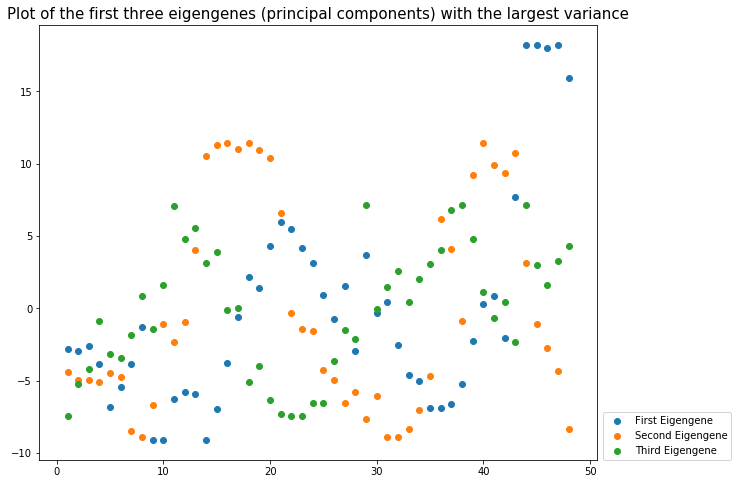

In [16]:
times = np.linspace(1,nc,nc)

eg1 = pca_eigengenes.iloc[:,0]
eg2 = pca_eigengenes.iloc[:,1]
eg3 = pca_eigengenes.iloc[:,2]

plt.figure(figsize=(10,8))
plt.scatter(times, eg1, label="First Eigengene")
plt.scatter(times, eg2, label="Second Eigengene")
plt.scatter(times, eg3, label="Third Eigengene")
plt.title('Plot of the first three eigengenes (principal components) with the largest variance', size=15)
plt.legend(loc=[1.01,0])
plt.show()

Next, plot these three eigengenes against each other:

Text(0.5, 1.0, '2nd vs 3rd')

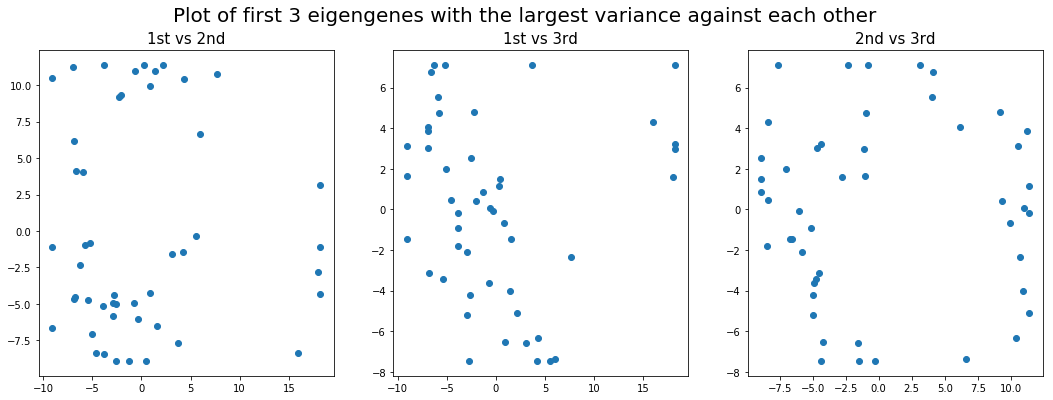

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
plt.suptitle('Plot of first 3 eigengenes with the largest variance against each other', size=20)

ax1.scatter(eg1, eg2)
ax1.set_title('1st vs 2nd', size=15)
ax2.scatter(eg1, eg3)
ax2.set_title('1st vs 3rd', size=15)
ax3.scatter(eg2, eg3)
ax3.set_title('2nd vs 3rd', size=15)

## 4. Creating the autoencoder model

In [18]:
data = pca_eigengenes.to_numpy()

In [19]:
def jump_control(X):
    X_ = X.copy()
    pop_list = []
    for i in range(1,len(X)):
        if X[i]-X[i-1]<10:
            pop_list.append(i)
    pop_list.sort(reverse=True)
    for i in pop_list:
        X_.pop(i)
    return X_

def iterr(data):
    model = cyclops(data.shape[1])
    n_epochs = 500
    history = model.train(data[np.random.permutation(data.shape[0]), :], epochs=n_epochs, verbose=n_epochs, batch_size=10)
    loss = history.history['loss'][-1]
    
    phase_df = model.phase_output(data)
    phase_idx = phase_df.index.to_numpy()
    phase_list = phase_df.pseudotime.to_numpy()
    
    zipped = list(zip(phase_idx,phase_list))
    re_phase_list = np.array([sorted(zipped, key = lambda t: t[0])[i][1] for i in range(len(zipped))])
    re_phase_idx = np.array([sorted(zipped, key = lambda t: t[0])[i][0] for i in range(len(zipped))])
    
    asc_phase_jump, desc_phase_jump = [],[]
    for i in range(len(re_phase_list)-1):
        if re_phase_list[i+1]-re_phase_list[i] > np.pi:
            desc_phase_jump.append(i)
        elif re_phase_list[i+1]-re_phase_list[i] < -np.pi:
            asc_phase_jump.append(i)
            
    if len(asc_phase_jump) > len(desc_phase_jump):
        phase_jump = asc_phase_jump
    else:
        phase_jump = desc_phase_jump


    phase_jump = jump_control(phase_jump)

    jumps = len(phase_jump)
    for i in range(jumps):
        if len(asc_phase_jump) > len(desc_phase_jump):
            re_phase_list = np.array([re_phase_list[i] if i < phase_jump[0]+1 else re_phase_list[i] + 2*np.pi for i in range(len(zipped))])
        else:
            re_phase_list = np.array([re_phase_list[i] if i < phase_jump[0]+1 else re_phase_list[i] - 2*np.pi for i in range(len(zipped))])
        phase_jump.pop(0)
    
    from scipy.stats import linregress

    lin = linregress(re_phase_idx, re_phase_list)
    
    r_squared = lin[2]**2
    
    return loss, r_squared

In [20]:
%%capture
%%time

n_iter = 50

iter_list = np.zeros([n_iter,2])

for i in range(n_iter):
    iter_list[i] = iterr(data)

In [21]:
cs = np.array([iter_list[i][0] for i in range(len(iter_list))])
r2 = np.array([iter_list[i][1] for i in range(len(iter_list))])

/Users/henrylim/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


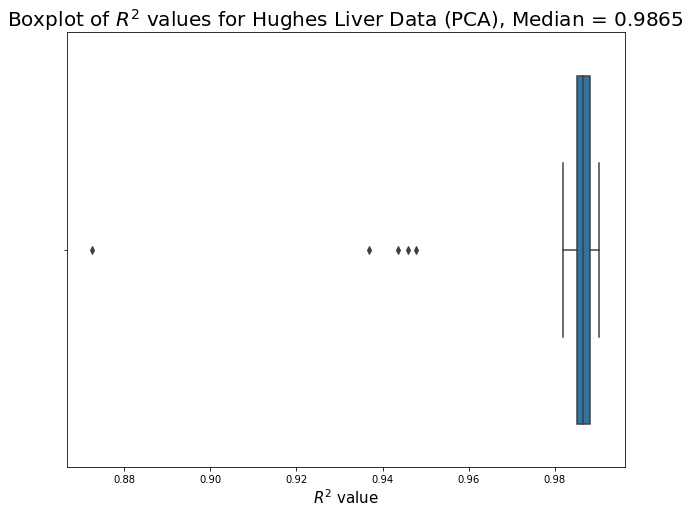

In [22]:
import seaborn as sns
import statistics

plt.figure(figsize=(10,8))
sns.boxplot(r2)
plt.xlabel(r'$R^2$ value', size=15)
plt.title(r'Boxplot of $R^2$ values for Hughes Liver Data (PCA), Median = {:.4f}'.format(statistics.median(r2)), size=20)
plt.show()